## PREPROCESSING + MODELISATION

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("maladie_cardiovasculaire.xlsx")

In [3]:
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
df.rename(columns={'DEPRESSION ':'DEPRESSION'}, inplace=True)
df['DEPRESSION'].head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: DEPRESSION, dtype: float64

In [5]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

### ENCODAGE FEATURE QUALITATIVE

In [6]:
df_quali = df.select_dtypes("object")
variables_quali = df_quali.columns
df_quali.head()

,SEXE,TDT,ECG,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant


In [7]:
### Fonction d'encodage OneHot
def encodage_OneHotEncoder(df_quali):
    
    encode = OneHotEncoder(sparse=False, drop='if_binary')
    
    df_quali_enc = pd.DataFrame(encode.fit_transform(df_quali), index=df_quali.index)
    df_quali_enc.columns = encode.get_feature_names(variables_quali)
    
    return df_quali_enc

In [8]:
df_quali = encodage_OneHotEncoder(df_quali)
df_quali.head()

,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### CONCATENATION

In [9]:
df_new = pd.concat([df.select_dtypes(include=np.number), df_quali], axis=1)
df_new.head()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,160,180,0,156,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48,138,214,0,108,1.5,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,54,150,195,0,122,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### SUBDIVISION DATASET

In [10]:
# Fonction pour diviser mon dataset en variables indépendantes et variables dépendantes
def decoupe_df(df):

    X=df.drop('CŒUR', axis=1)
    y=df['CŒUR']
    
    return X, y

In [11]:
X, y = decoupe_df(df_new)

print(df_new.shape)
print(X.shape)
print(y.shape)

(918, 19)
(918, 18)
(918,)


In [12]:
X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
X_train.head()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,56,170,388,0,122,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,48,120,284,0,120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,55,145,248,0,96,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,67,100,299,0,125,0.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,63,150,223,0,115,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
y_train.head()

132    1
9      0
254    1
787    1
82     1
Name: CŒUR, dtype: int64

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 18)
(276, 18)
(642,)
(276,)


### NORMALISATION FEATURES QUANTITATIVES CONTINUES

In [16]:
df.select_dtypes(include=np.number)

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [17]:
var_quant_cont = df.select_dtypes(include=np.number).drop(['GAJ','CŒUR'], axis=1).columns
var_quant_cont

Index(['AGE', 'PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION'], dtype='object')

In [18]:
### Créons une fonction et séparons les données quanti, des données quali chez les features X_train et X_test
def decoupe_X(X):

    X_quanti = X[var_quant_cont]
    X_quali = X.drop(columns=var_quant_cont)
    
    return X_quanti, X_quali

In [19]:
## Separation quanti quali X_train
X_train_quanti, X_train_quali = decoupe_X(X_train)

In [20]:
X_test_quanti, X_test_quali = decoupe_X(X_test)

In [21]:
X_train_quanti.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
132,56,170,388,122,2.0
9,48,120,284,120,0.0
254,55,145,248,96,2.0
787,67,100,299,125,0.9
82,63,150,223,115,0.0


In [22]:
X_train_quali.head()

,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
X_test_quanti.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
349,36,110,0,125,1.0
653,42,130,180,150,0.0
7,54,110,208,142,0.0
571,69,140,110,109,1.5
171,40,140,235,188,0.0


In [24]:
X_test_quali.head()

,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
349,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
653,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
571,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
171,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### NORMALISATION

Ensuite, créons une pipeline pour normaliser les variables quantitatives. Nous nous servons de la normalisation effectuer sur les données d'entrainement pour affecter les données de test.

In [25]:
## Pipeline pour normaliser X_train et X_test
def pipeline_normalizer(train,test):
    
    scaler = RobustScaler()

    df_train=scaler.fit_transform(train)
    df_train = pd.DataFrame(df_train, index=train.index, columns=train.columns)

    df_test = scaler.transform(test)
    df_test = pd.DataFrame(df_test, index=test.index, columns=test.columns)

    
    return df_train,df_test

In [26]:
X_train_quanti, X_test_quanti = pipeline_normalizer(X_train_quanti, X_test_quanti)

In [27]:
X_train_quanti.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
132,0.142857,2.00,1.733681,-0.432432,0.933333
9,-0.428571,-0.50,0.647520,-0.486486,-0.400000
254,0.071429,0.75,0.271540,-1.135135,0.933333
787,0.928571,-1.50,0.804178,-0.351351,0.200000
82,0.642857,1.00,0.010444,-0.621622,-0.400000


In [28]:
X_test_quanti.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
349,-1.285714,-1.0,-2.318538,-0.351351,0.266667
653,-0.857143,0.0,-0.438642,0.324324,-0.400000
7,0.000000,-1.0,-0.146214,0.108108,-0.400000
571,1.071429,0.5,-1.169713,-0.783784,0.600000
171,-1.000000,0.5,0.135770,1.351351,-0.400000


In [29]:
### RECONSTITUTION DES FEATURES
X_train = pd.concat([X_train_quanti, X_train_quali], axis=1)
X_test = pd.concat([X_test_quanti, X_test_quali], axis=1)

In [30]:
X_train.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,0.142857,2.00,1.733681,-0.432432,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,-0.428571,-0.50,0.647520,-0.486486,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,0.071429,0.75,0.271540,-1.135135,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
787,0.928571,-1.50,0.804178,-0.351351,0.200000,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0.642857,1.00,0.010444,-0.621622,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_test.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_LVH,ECG_Normal,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
349,-1.285714,-1.0,-2.318538,-0.351351,0.266667,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
653,-0.857143,0.0,-0.438642,0.324324,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.000000,-1.0,-0.146214,0.108108,-0.400000,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
571,1.071429,0.5,-1.169713,-0.783784,0.600000,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
171,-1.000000,0.5,0.135770,1.351351,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### MODELISATION

In [48]:
# Les différents estimateurs
model_1 = KNeighborsClassifier()
model_2 = SVC(kernel='linear')
model_3 = LogisticRegression(solver='liblinear', random_state=0)
model_4 = RandomForestClassifier(random_state=0)

In [49]:
# Courbe d'apprentissage
plt.figure(figsize=(15,8))
def courbe_apprentissage(model,X_train, y_train):
    N, train_score, val_score = learning_curve(model, X_train, y_train,train_sizes=np.linspace(0.1,1.0,10), cv=5)
    plt.figure(figsize=(15,8))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train_size')
    plt.legend()
    plt.show()

<Figure size 1080x576 with 0 Axes>

KNeighborsClassifier 0.8731884057971014
[[ 97  23]
 [ 12 144]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



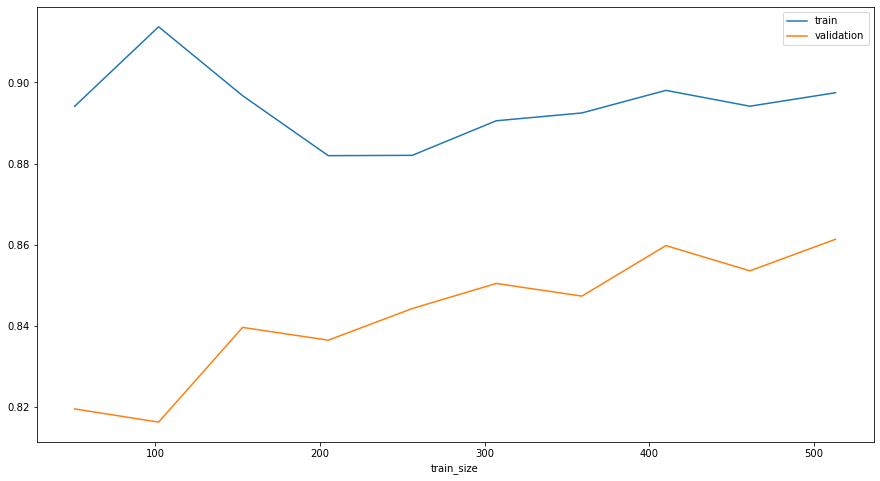

SVC 0.8586956521739131
[[ 97  23]
 [ 16 140]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       120
           1       0.86      0.90      0.88       156

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



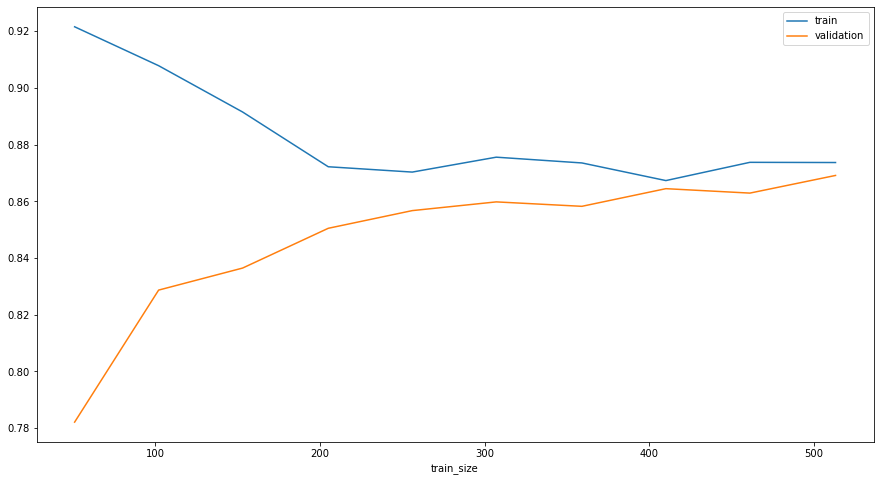

LogisticRegression 0.8659420289855072
[[ 97  23]
 [ 14 142]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       120
           1       0.86      0.91      0.88       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



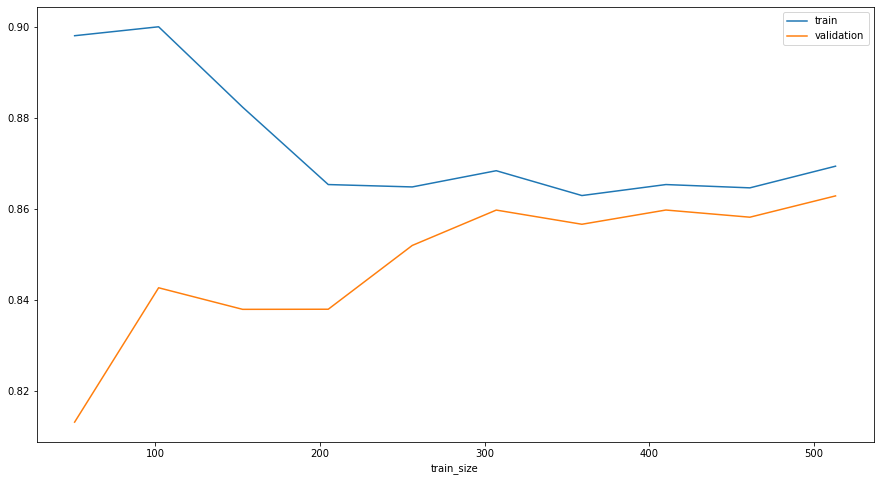

RandomForestClassifier 0.8731884057971014
[[ 95  25]
 [ 10 146]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       120
           1       0.85      0.94      0.89       156

    accuracy                           0.87       276
   macro avg       0.88      0.86      0.87       276
weighted avg       0.88      0.87      0.87       276



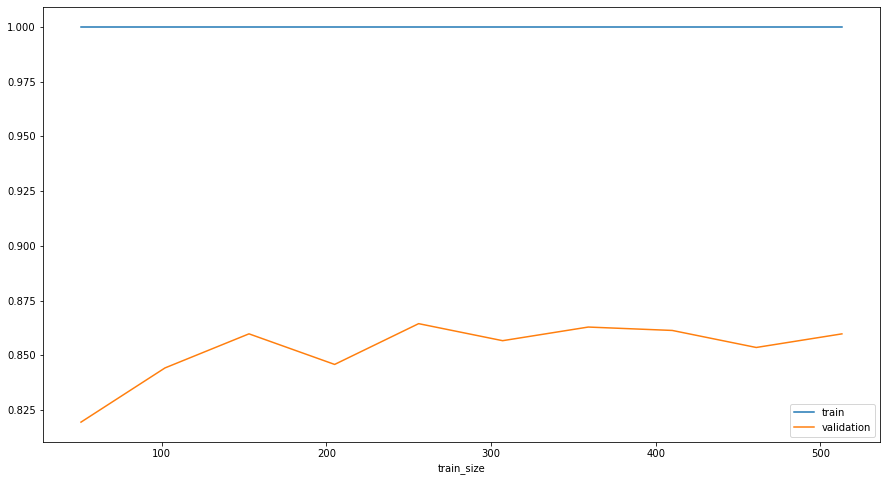

In [50]:
# entrainement de chaque modèle et performance de chaque modèle
for model in (model_1, model_2,  model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))
    
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    courbe_apprentissage(model, X_train, y_train)
    print(120*'=')

Choix du modèle LogisticRegression pour ma classification.

### FEATURE SELECTION

In [60]:
# Utilisation de la fonction RFECV
selector = RFECV(model_3, step=1, min_features_to_select=1, cv=5)
selector.fit(X_train, y_train)
print(selector.ranking_)
print(selector.grid_scores_)

[1 4 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1]
[0.81157946 0.81157946 0.81618217 0.84419816 0.85972626 0.85818798
 0.85662548 0.85661337 0.84887355 0.85506298 0.8566376  0.8628876
 0.86443798 0.86600048 0.86756298 0.86755087 0.86600048 0.86287548]


In [61]:
# Liste des colonnes selectionnées par RFECV
colonne_selectioner = np.array(X_train.columns)[selector.get_support()]
colonne_selectioner

array(['AGE', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION', 'GAJ', 'SEXE_homme',
       'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA', 'ECG_ST', 'ANGINE_Oui',
       'PENTE_Ascendant', 'PENTE_Descendant', 'PENTE_Plat'], dtype=object)

In [62]:
X_train_review, X_test_review = X_train[colonne_selectioner], X_test[colonne_selectioner]    

In [63]:
X_train_review.head()

,AGE,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
132,0.142857,1.733681,-0.432432,0.933333,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,-0.428571,0.647520,-0.486486,-0.400000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
254,0.071429,0.271540,-1.135135,0.933333,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
787,0.928571,0.804178,-0.351351,0.200000,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
82,0.642857,0.010444,-0.621622,-0.400000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
X_test_review.head()

,AGE,CHOLESTEROL,FCMAX,DEPRESSION,GAJ,SEXE_homme,TDT_AA,TDT_ASY,TDT_AT,TDT_DNA,ECG_ST,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
349,-1.285714,-2.318538,-0.351351,0.266667,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
653,-0.857143,-0.438642,0.324324,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.000000,-0.146214,0.108108,-0.400000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
571,1.071429,-1.169713,-0.783784,0.600000,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
171,-1.000000,0.135770,1.351351,-0.400000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### EVALUATION

In [66]:
def evaluation(model, X_train, y_train, X_test, y_test):
    print(model)
    print(" ")
    model.fit(X_train, y_train)
    print(f"Score à l'entrainement : {model.score(X_train, y_train)}")
    print(f"Score au test : {model.score(X_test, y_test)}")
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    courbe_apprentissage(model, X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')
 
Score à l'entrainement : 0.8644859813084113
Score au test : 0.8623188405797102
[[ 97  23]
 [ 15 141]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       120
           1       0.86      0.90      0.88       156

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



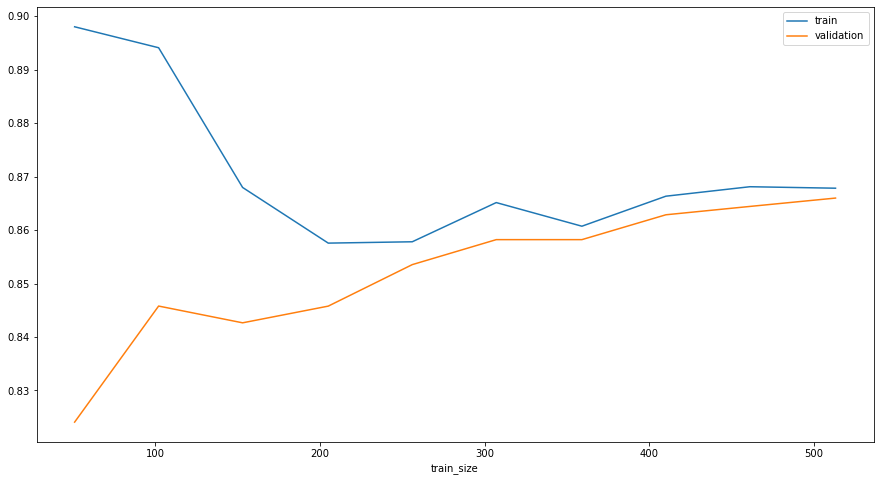

In [67]:
evaluation(model_3, X_train_review, y_train, X_test_review, y_test)

### COURBE DE VALIDATION

Visualisons la courbe de validation pour diagnostiquer le biais du modèle par rapport à la variance vis-à-vis des paramètres du modèle et voyons les différents scores du modèle pour les données d'entrainement et de test par rapport à 'hyper paramètre de régularisation inverse C. 

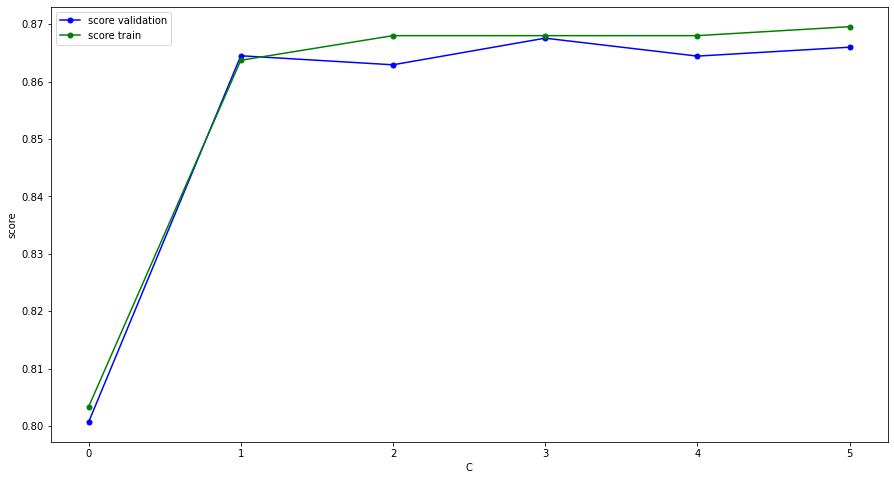

In [78]:
k = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
plt.figure(figsize=(15,8))

train_score, val_score = validation_curve(model_3, X_train_review, y_train, 'C', param_range=k, cv=5)

plt.plot(val_score.mean(axis=1), marker='o', markersize=5,
         color='blue', label='score validation')
plt.plot(train_score.mean(axis=1), marker='o', markersize=5,
         color='green', label='score train')

plt.xlabel('C')
plt.ylabel('score')
plt.legend()
plt.show()

- Pour une valeur inférieure de C (plus grande force de régularisation), le modèle tend à sous-appendre.

- Pour une plus grande valeur de C (moindre force de régularisation), le modèle semble stable. Le plus grand score au test est atteint pour une valeur de C = 3.

### OPTIMISATION DES PARAMETRES DU MODELE

In [79]:
param_grid = {
    'C': [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
}

grid = GridSearchCV(model_3, param_grid, cv=5)

In [80]:
# Entrainement de notre grille sur les données d'entrainements
grid.fit(X_train_review,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]})

In [81]:
# Le meilleur score 
grid.best_score_

0.8675508720930232

In [82]:
# Meilleur paramètre
grid.best_params_

{'C': 0.5}

In [83]:
# Souvegarde du modèle
model_valid=grid.best_estimator_

LogisticRegression(C=0.5, random_state=0, solver='liblinear')
 
Score à l'entrainement : 0.8660436137071651
Score au test : 0.8659420289855072
[[ 97  23]
 [ 14 142]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       120
           1       0.86      0.91      0.88       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



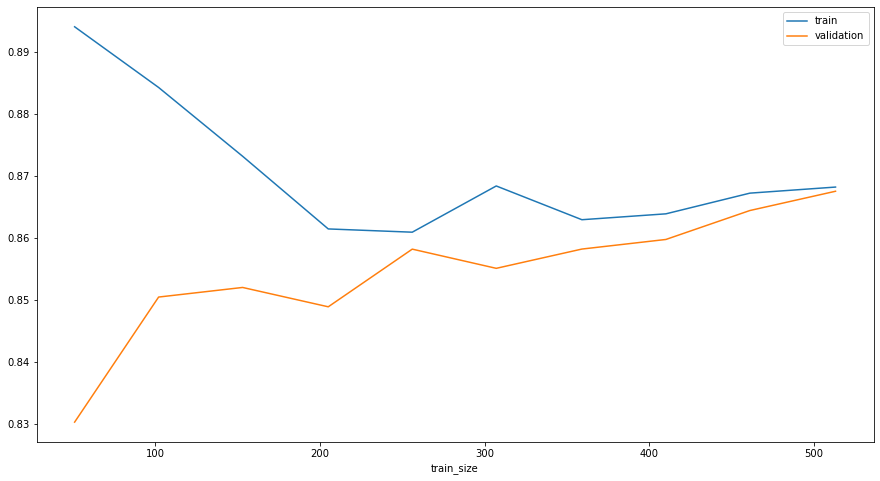

In [84]:
### evaluation du modèle
evaluation(model_valid, X_train_review, y_train, X_test_review, y_test)